# Questions
- How lifestyle factors affect sleep health?
- What can we do to improve our sleep quality?
- Factors that help us to understand our sleep quality
- There is something that can be do to reduce stress

# Libraries

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Settings

In [2]:
sns.set(style = 'whitegrid', font_scale = 1.2)
path = os.path.join('assets', 'datasets')
os.chdir(path)

In [3]:
df = pd.read_parquet('./Sleep_health_and_lifestyle_dataset_preprocessed.parquet')

# Functions

In [4]:
def show_scatter_plot(df, x, y, hue=None, style=None):
    if style:
        df_sliced = df[ [x, y, hue, style] ]
    elif hue:
        df_sliced = df[ [x, y, hue] ]
    else:
        df_sliced = df[ [x, y] ]
    
    df_sliced = df_sliced.value_counts().reset_index()
    # ax = sns.relplot(data=df_sliced, x=x, y=y, hue=hue, style=style, size='count', sizes=(50, 300))
    ax = sns.scatterplot(data=df_sliced, x=x, y=y, hue=hue, style=style, size='count', sizes=(50, 300))
    
    return ax


def calculate_correlation(df, x, y, col_cat, slope=False):
    list_cat = df[col_cat].unique()
    
    for cat in list_cat:
        df_cat = df[ df[col_cat] == cat ]
        result = stats.linregress(df_cat[x], df_cat[y])
        
        if slope:
            str_res = f'{cat}: pearson index = {result.rvalue}, p value = {result.pvalue}, slope: {result.slope}'
        else:
            str_res = f'{cat}: pearson index = {result.rvalue}, p value = {result.pvalue}'
        print(str_res)

# How lifestyle factors affect sleep health?

## What can say about sex?

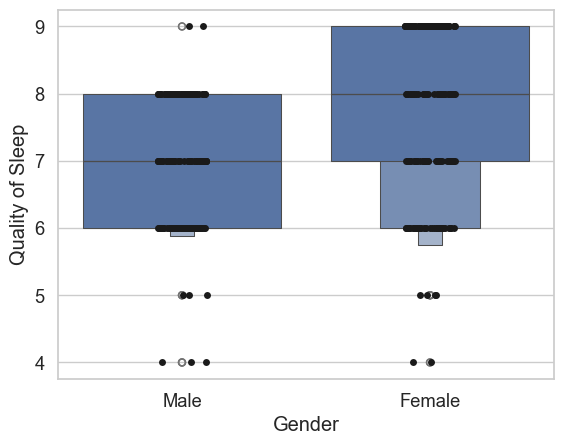

In [5]:
sns.boxenplot(data=df, x='Gender', y='Quality of Sleep')
sns.stripplot(data=df, x='Gender', y='Quality of Sleep', color='k');

It seems that women have higher sleep quality than men, but why? Probably because they have certain characteristics or behaviors that men don't have.

## Let's dive and divide by BMI

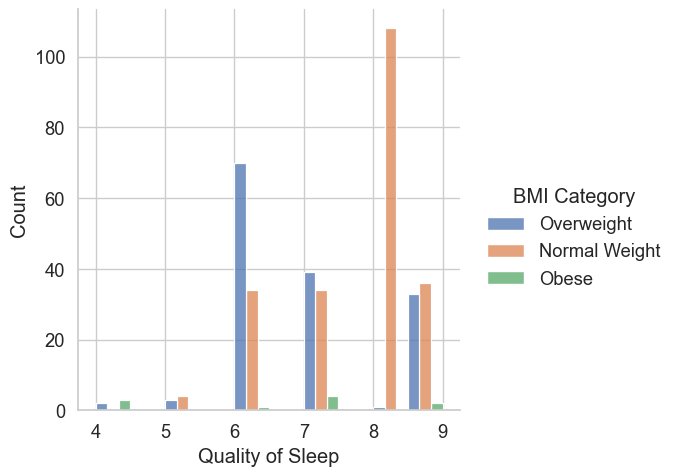

In [6]:
sns.displot(data=df, x='Quality of Sleep', hue='BMI Category', multiple='dodge')

sembra che i normo pesi tendano ad avere una qualita del sonno migliore dei sovraoppesi. Non essendoci una forte correlazione tengo in considerazione questo aspetto sul fatto che l'IBM incide sulla qualità del peso ma non in maniera eclatante

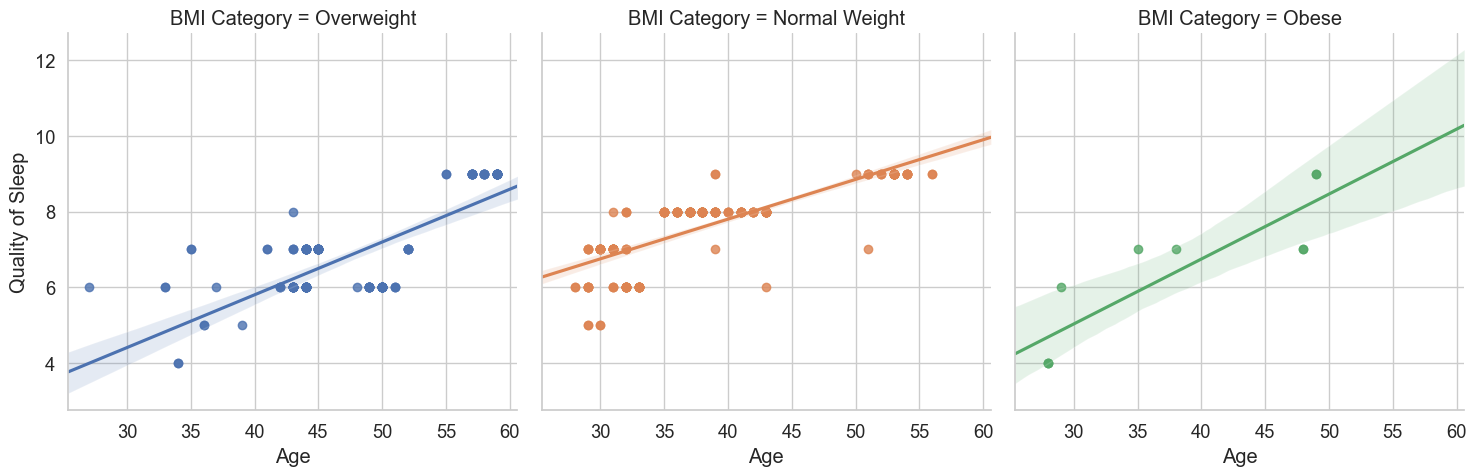

In [7]:
sns.lmplot(data=df, x='Age', y='Quality of Sleep',  hue='BMI Category', col='BMI Category', truncate=False)

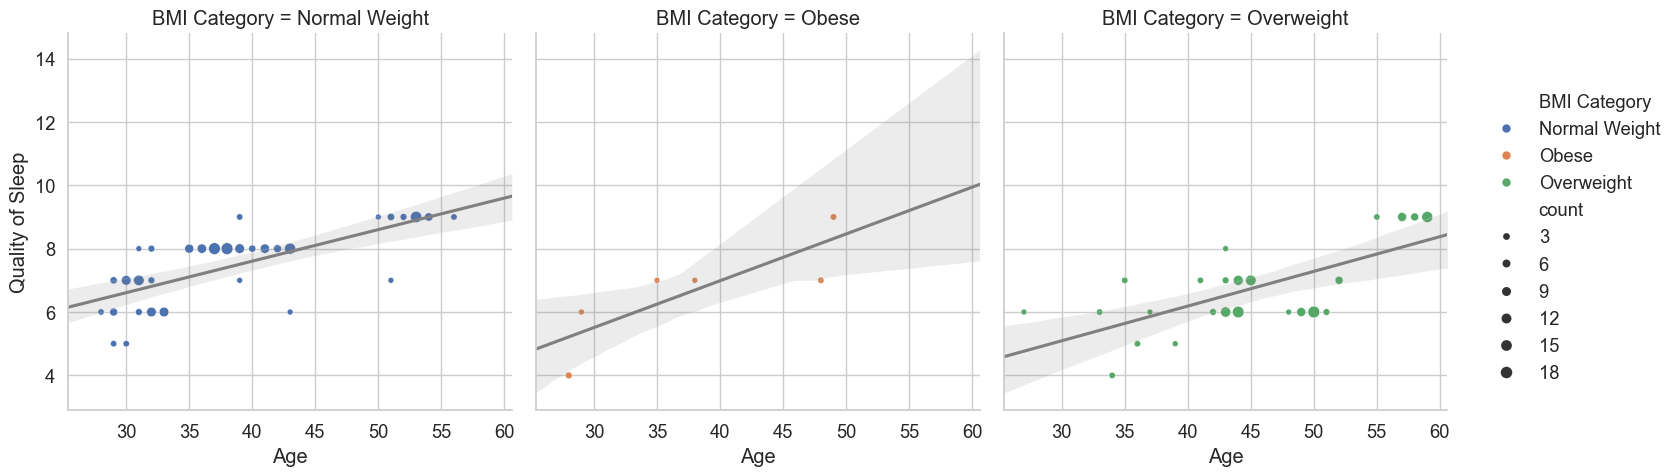

In [8]:
df_grouped = df.groupby('BMI Category')[ ['Age', 'Quality of Sleep'] ].value_counts()
df_filtered = df_grouped.reset_index()
g = sns.relplot(data=df_filtered, x='Age', y='Quality of Sleep', col='BMI Category', hue='BMI Category', size='count')
g.map_dataframe(sns.regplot, x='Age', y='Quality of Sleep', truncate=False, scatter=False, ax=g.axes, color = '0.5')

**gli ultimi due grafici li ho messi perche non so quale sia migliore**

In [9]:
calculate_correlation(df, 'Age', 'Quality of Sleep', 'BMI Category')

Overweight: pearson index = 0.7636331943527127, p value = 1.561991289943795e-29
Normal Weight: pearson index = 0.7987039676956265, p value = 4.2049536310631255e-49
Obese: pearson index = 0.8709673386173972, p value = 0.001034891319696467


Concludendo:
- l'IBM sembra influenzare leggermente sulla qualità del sonno
- c'e una correlazione (non casualità) tra età e qualità del sonno (under 30 dormono tutti male mentre over 50 dormono bene). Come mai, chi è che genera questa correlazione?
- Come è possibile che le persone obese abbiano un'ottima qualità del sonno?

**if we consider obese people with high sleep quality we can see three things in common: low stress level, high sleep duration, high physical activity**



Let's apply these finding to all the people of dataset

## Is there a correlation between sleep quality and sleep duration?

In [10]:
calculate_correlation(df, 'Quality of Sleep', 'Sleep Duration', 'BMI Category')

Overweight: pearson index = 0.9439986866660762, p value = 3.44322911765275e-72
Normal Weight: pearson index = 0.8134575670284538, p value = 2.873212162938578e-52
Obese: pearson index = 0.9784116178018625, p value = 9.25897377773874e-07


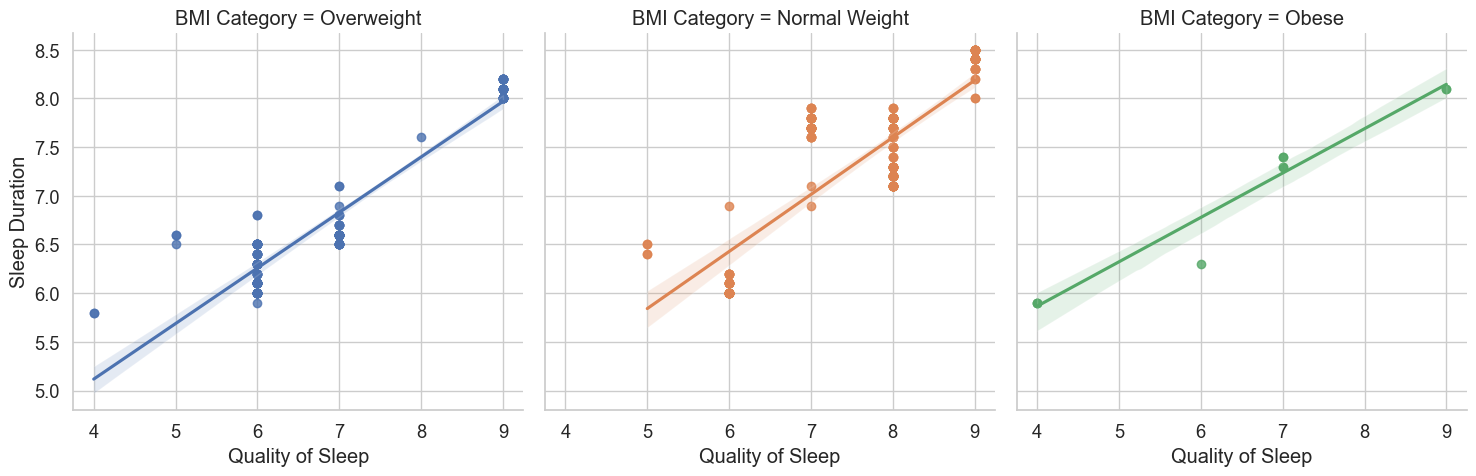

In [11]:
sns.lmplot(data=df, x='Quality of Sleep', y='Sleep Duration', hue='BMI Category', col='BMI Category')

## Is there a correlation between sleep quality and stress level?

Overweight: pearson index = -0.8753419200890716, p value = 6.286613792027736e-48
Normal Weight: pearson index = -0.9417597452721999, p value = 3.004947878633058e-103
Obese: pearson index = -0.9867886579568518, p value = 1.3117888780086285e-07


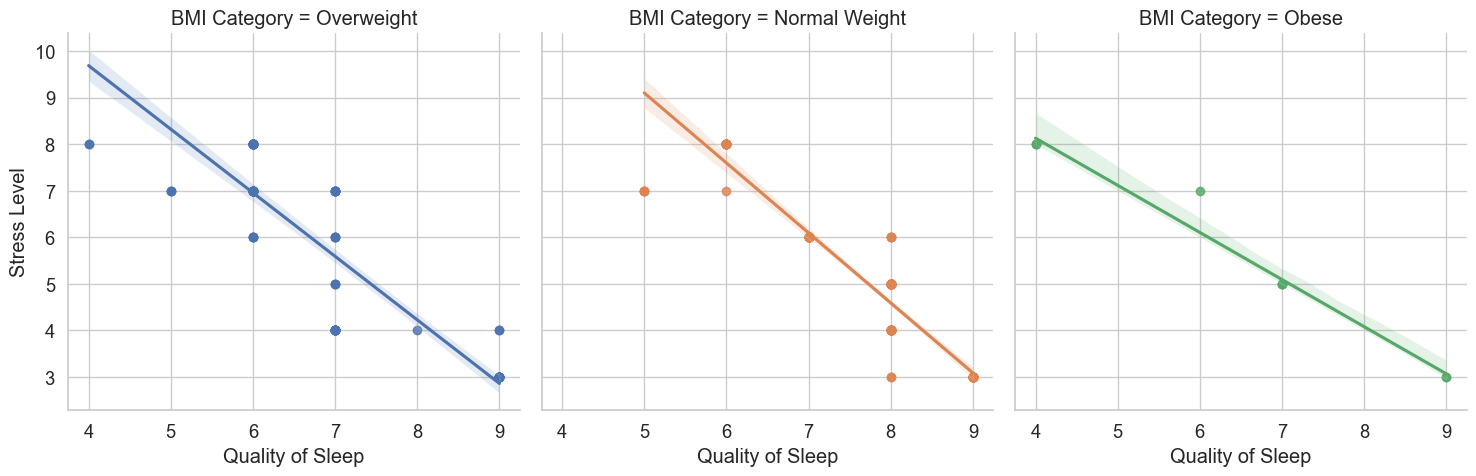

In [12]:
sns.lmplot(data=df, x='Quality of Sleep', y='Stress Level', hue='BMI Category', col='BMI Category')
calculate_correlation(df, 'Quality of Sleep', 'Stress Level', 'BMI Category')

## Is there a correlation between sleep duration and stress level?

Overweight: pearson index = -0.8392733129459251, p value = 1.8092336759582431e-40
Normal Weight: pearson index = -0.7966018356549004, p value = 1.1306107709628246e-48
Obese: pearson index = -0.9963569000740307, p value = 7.672952484881803e-10


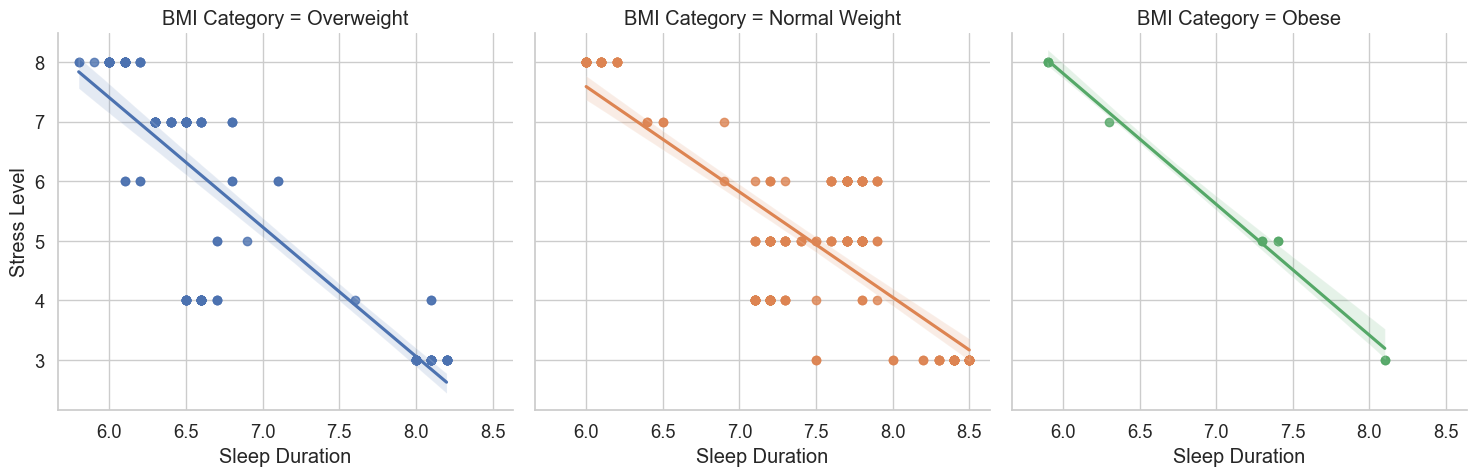

In [13]:
sns.lmplot(data=df, x='Sleep Duration', y='Stress Level', hue='BMI Category', col='BMI Category')
calculate_correlation(df, 'Sleep Duration', 'Stress Level', 'BMI Category')

## Is there a correlation between quality of sleep and physical activity level?

Overweight: pearson index = 0.2562816305095015, p value = 0.0016662943866820336, slope: 4.050234974751169
Normal Weight: pearson index = 0.14601964487220473, p value = 0.0319448504281743, slope: 3.138087815016874
Obese: pearson index = 0.981761387347632, p value = 4.7359622783288996e-07, slope: 11.11111111111111


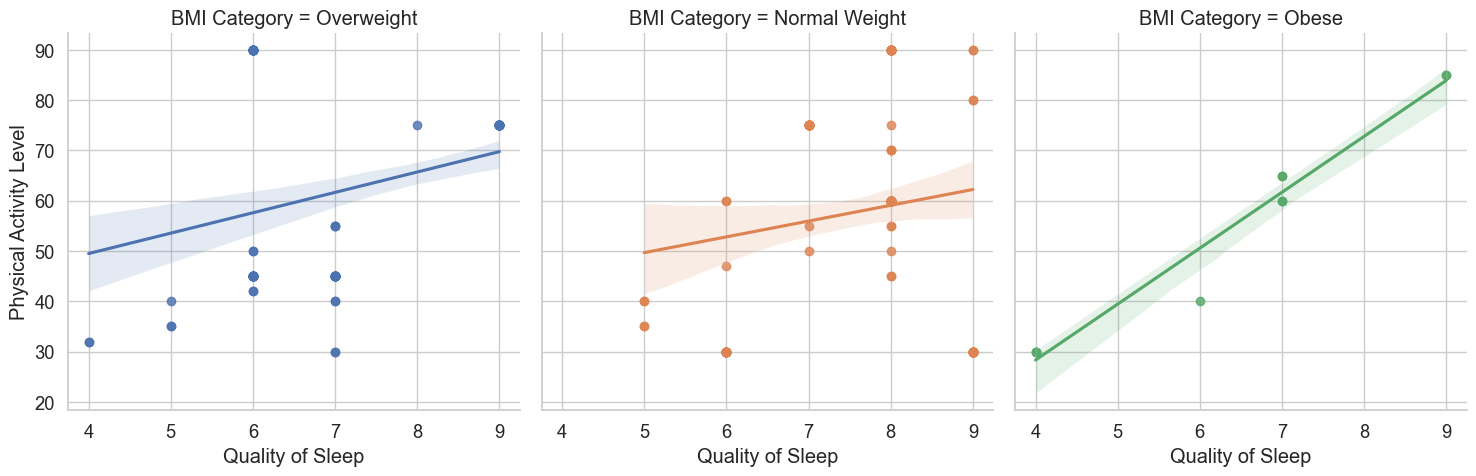

In [14]:
sns.lmplot(data=df, x='Quality of Sleep', y='Physical Activity Level', hue='BMI Category', col='BMI Category')
calculate_correlation(df, 'Quality of Sleep', 'Physical Activity Level', 'BMI Category', slope=True)

## Let's find the casualty between age and sleep quality

## Is it true that there is a correlation between sleep quality and age?

Overweight: pearson index = 0.6877221562207692, p value = 4.708369738033912e-22
Normal Weight: pearson index = 0.6808805468277321, p value = 9.04279102721715e-31
Obese: pearson index = 0.8934428735649457, p value = 0.0004950683470050124


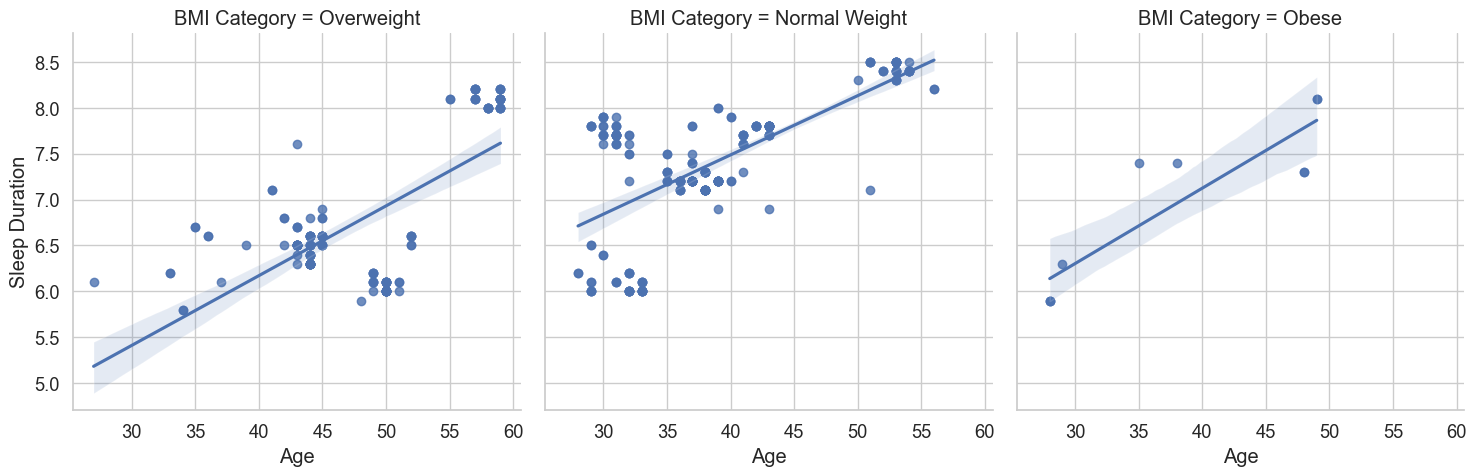

In [15]:
sns.lmplot(data=df, x='Age', y='Sleep Duration', col='BMI Category')
calculate_correlation(df, 'Age', 'Sleep Duration', 'BMI Category')

## Is it true that there is a correlation between stress level and age?

Overweight: pearson index = -0.44210455646243757, p value = 1.8504088813549834e-08
Normal Weight: pearson index = -0.7241359332478134, p value = 2.1985218051599622e-36
Obese: pearson index = -0.9024117371683512, p value = 0.0003521928462137899


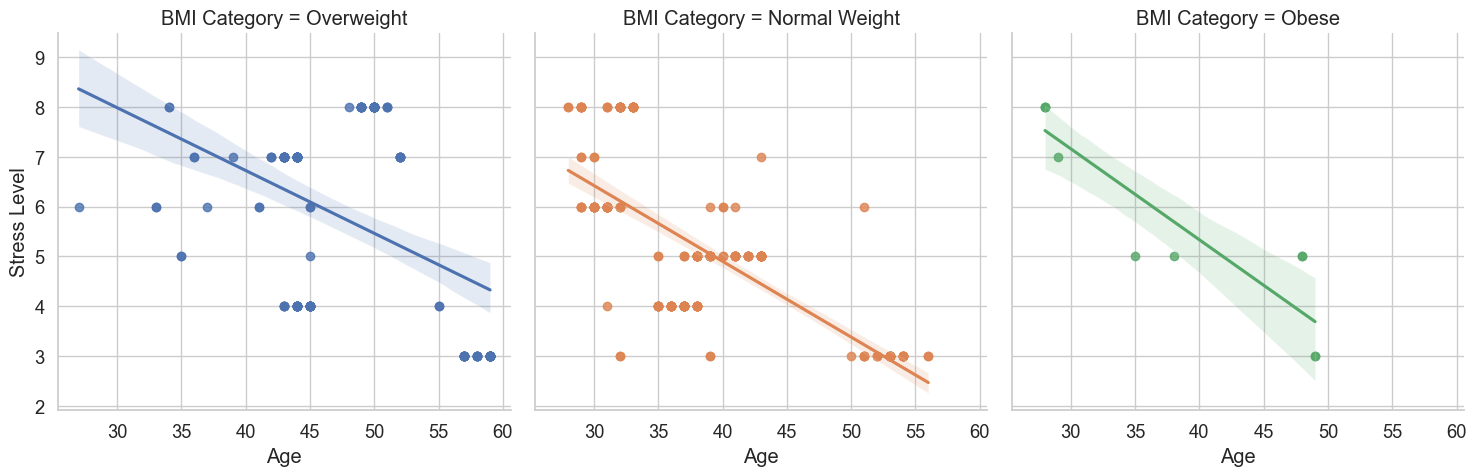

In [16]:
sns.lmplot(data=df, x='Age', y='Stress Level', col='BMI Category', hue='BMI Category')
calculate_correlation(df, 'Age', 'Stress Level', 'BMI Category')

there is a strong correlation between stress level and age

# What can we do to improve our sleep quality?

## We can reduce our stress

### We spend most of our time working. Can be useful know which work is more stressful

<Axes: xlabel='Stress Level', ylabel='Occupation'>

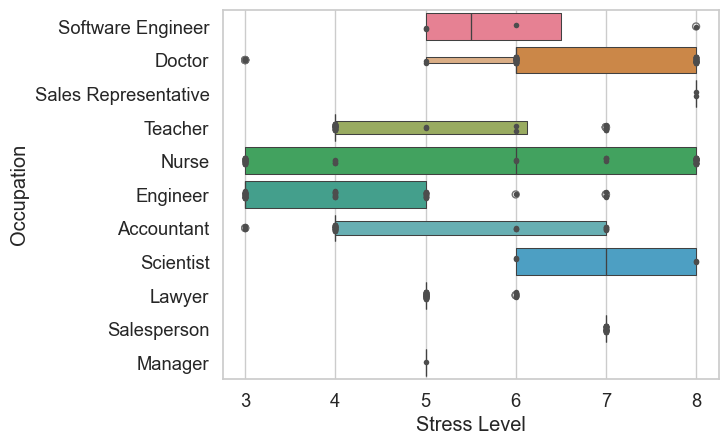

In [17]:
sns.boxenplot(data=df, x='Stress Level', y='Occupation', hue='Occupation')
sns.stripplot(data=df, x='Stress Level', y='Occupation', size=4, color=".3")

### Stress vs heart rate

Overweight: pearson index = 0.8144828770075264, p value = 2.4414803953177133e-36
Normal Weight: pearson index = 0.803652411575927, p value = 3.9097832973006886e-50
Obese: pearson index = -0.21766071355693958, p value = 0.5457905697574961


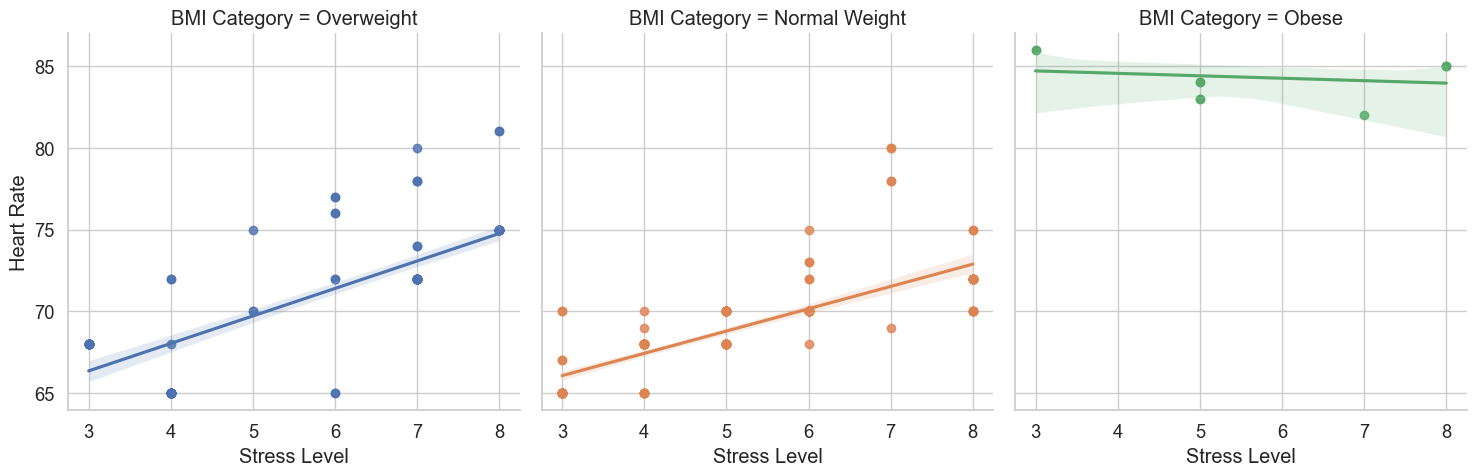

In [18]:
sns.lmplot(df, x='Stress Level', y='Heart Rate', col='BMI Category', hue='BMI Category')

calculate_correlation(df, 'Stress Level', 'Heart Rate', 'BMI Category')

### Is there something that can we do to reduce the heart rate?

Overweight: pearson index = 0.2520627484637327, p value = 0.0019979596712669276
Normal Weight: pearson index = 0.11358335163785403, p value = 0.09590599190546574
Obese: pearson index = 0.21277750059841144, p value = 0.555055892867709


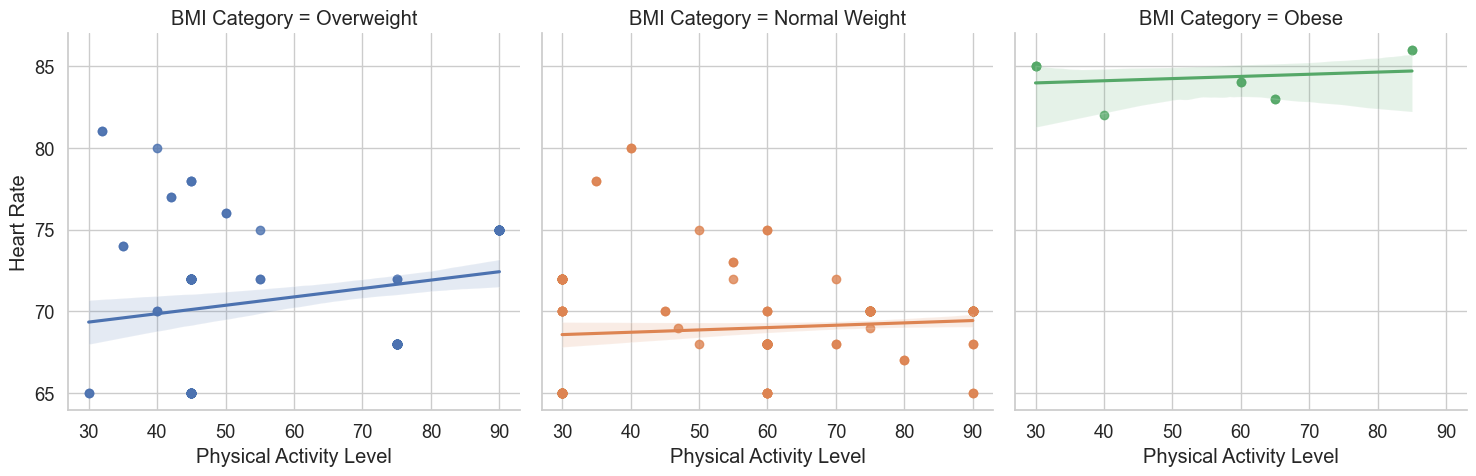

In [19]:
sns.lmplot(df, x='Physical Activity Level', y='Heart Rate', col='BMI Category', hue='BMI Category')
calculate_correlation(df, 'Physical Activity Level', 'Heart Rate', 'BMI Category')

### Can we do something more?

Overweight: pearson index = 0.32854900103442636, p value = 4.565124226012179e-05
Normal Weight: pearson index = 0.09811234783148115, p value = 0.1507027677387294
Obese: pearson index = -0.0752803769241298, p value = 0.8362542466348565


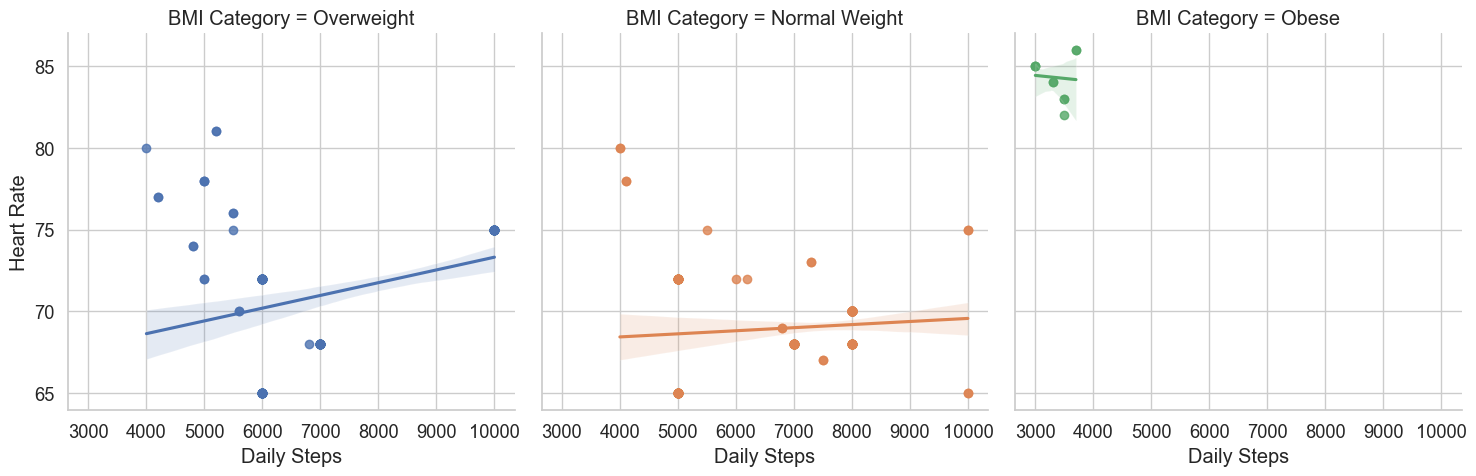

In [20]:
sns.lmplot(df, x='Daily Steps', y='Heart Rate', col='BMI Category', hue='BMI Category')
calculate_correlation(df, 'Daily Steps', 'Heart Rate', 'BMI Category')

Physical activity doesn't seem to help us

## We have already seen that physical activity helps only obese people. What can be said about daily steps?

Overweight: pearson index = 0.39736675990822634, p value = 5.713562835878644e-07
Normal Weight: pearson index = 0.03346890890534001, p value = 0.6247189546551682
Obese: pearson index = -0.8793594899535915, p value = 0.0007991916214686431


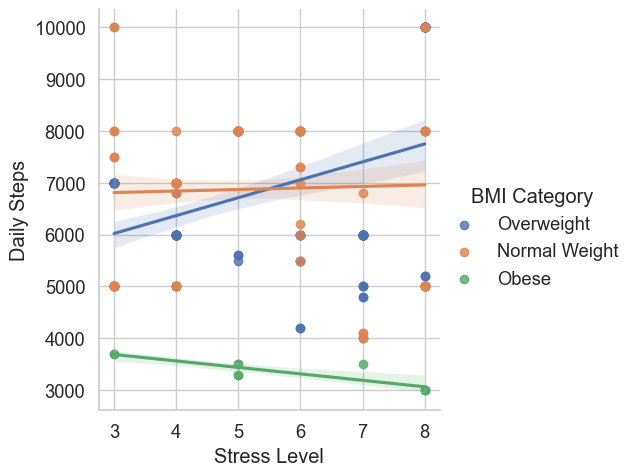

In [21]:
sns.lmplot(data=df, x='Stress Level', y='Daily Steps', hue='BMI Category')
calculate_correlation(df, 'Stress Level', 'Daily Steps', 'BMI Category')

# Factors that help us to understand our sleep quality

## If we know that we have sleep disorders can we conclude something about our quality of sleep? How relevant are sleep disorders to our quality of sleep?

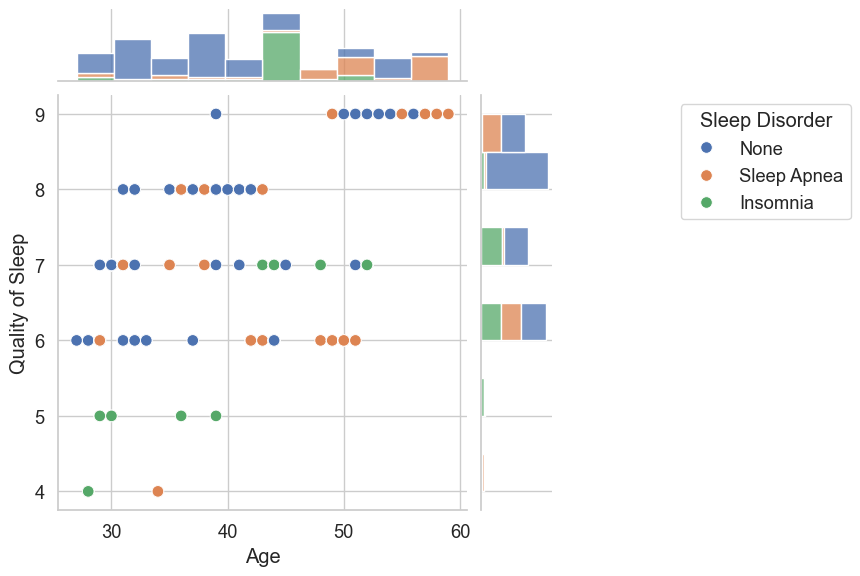

In [22]:
g = sns.JointGrid(df, x='Age', y='Quality of Sleep', hue='Sleep Disorder')
g.plot_joint(sns.scatterplot, s=70)
g.plot_marginals(sns.histplot, multiple='stack')
sns.move_legend(g.ax_joint.axes, "upper left", bbox_to_anchor=(1.5, 1))

## Is there a correlation between BMI and sleep disorders

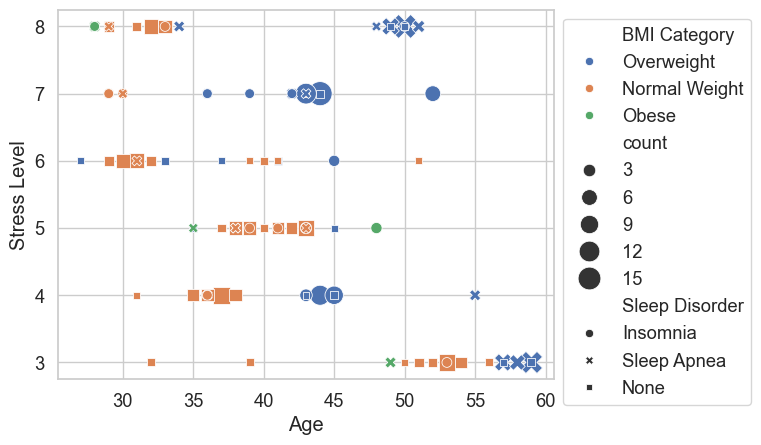

In [23]:
ax = show_scatter_plot(df, 'Age', 'Stress Level', 'BMI Category', 'Sleep Disorder')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

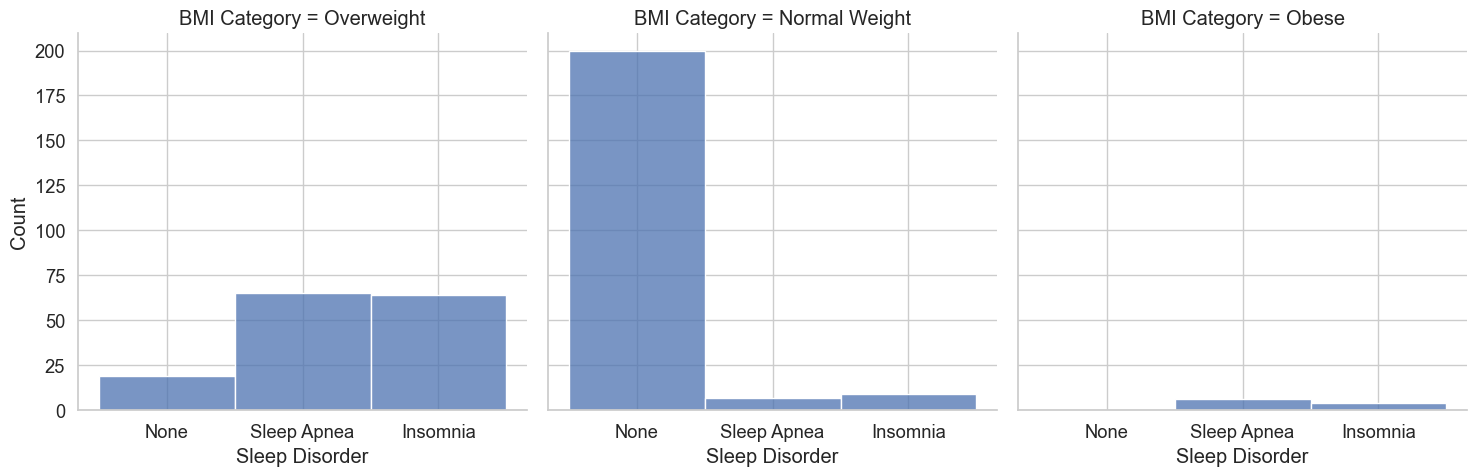

In [24]:
g = sns.FacetGrid(df, col="BMI Category", height=5)
g.map_dataframe(sns.histplot, x='Sleep Disorder')

si noti che chi non è normopeso presenta sempre sleep disorders. Naturalmente rimangano le eccezzioni. Come mai?

Guardando le eta estreme e ricordando la correlazione tra stress e qualita del sonno, si puo ipotizzare che lo stress influenza in maniera non troppo decisiva la presenza o meno di disturbi del sonno.

Inoltre se ce questa forte correlazione tra bmi e sleep disorder, possiamo iniziare a svolgere attivita fisica per migliorare il nostro bmi?

## Stress level and sleep disorder on under 30

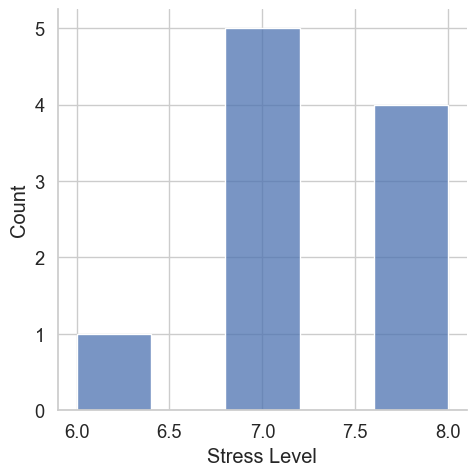

In [25]:
m1 = df['Age'] < 32
m2 = df['Sleep Disorder'] == 'Sleep Apnea'
m3 = df['Sleep Disorder'] == 'Insomnia'
df_under_30 = df[ m1 & (m2 | m3) ]
sns.displot(data=df_under_30, x='Stress Level')

We have found another variable that influence sleep disorders

## bmi and physical activity

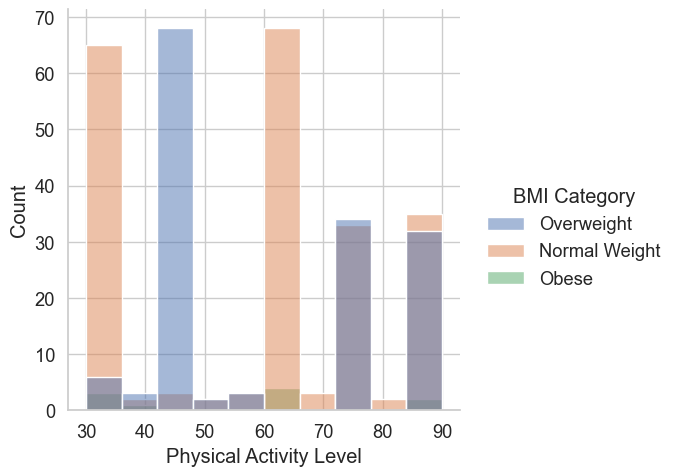

In [26]:
sns.displot(data=df, x='Physical Activity Level', hue='BMI Category')

There don't seem to be any correlations

## Can blood pressure be useful to tell us if we have sleep disorders or we sleep well?

## Blood pressure, sleep disorders and BMI

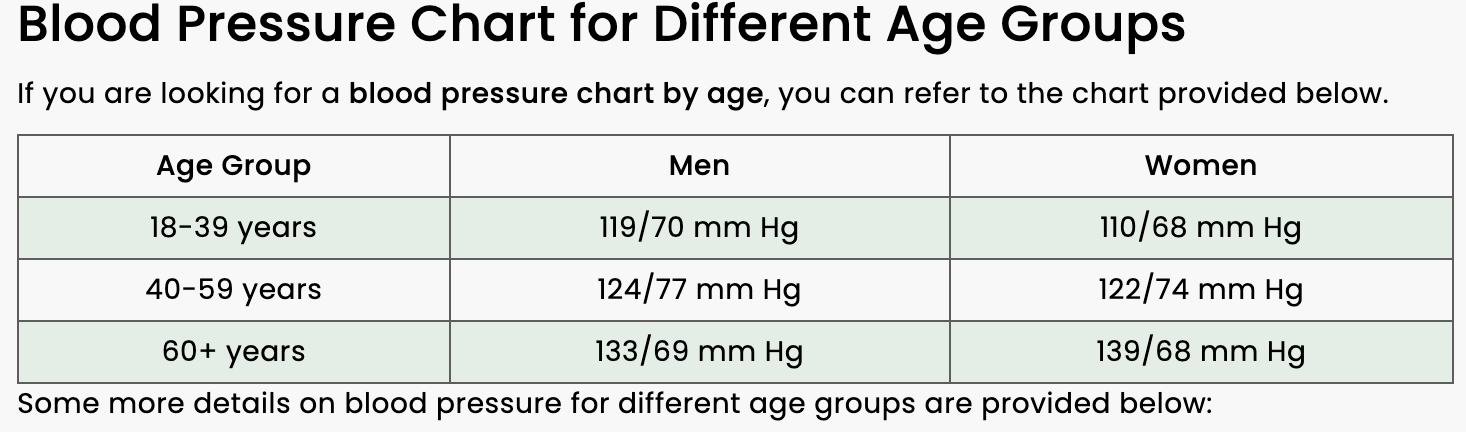
image by [metropolisindia](https://www.metropolisindia.com/blog/preventive-healthcare/understanding-blood-pressure-normal-range-and-age-related-chart#:~:text=Blood%20Pressure%20Chart%20for%20Different%20Age%20Groups)

### male

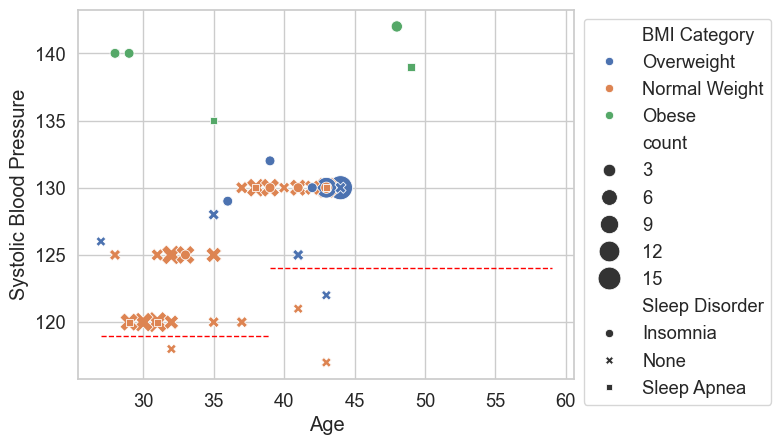

In [27]:
df_male = df[ df['Gender'] == 'Male' ]
ax = show_scatter_plot(df_male, 'Age', 'Systolic Blood Pressure', 'BMI Category', 'Sleep Disorder')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

line_args = {'color':'red', 'linestyle':'dashed', 'linewidth':1}

plt.plot([27, 39], [119, 119], **line_args)
plt.plot([39, 59], [124, 124], **line_args)

### female

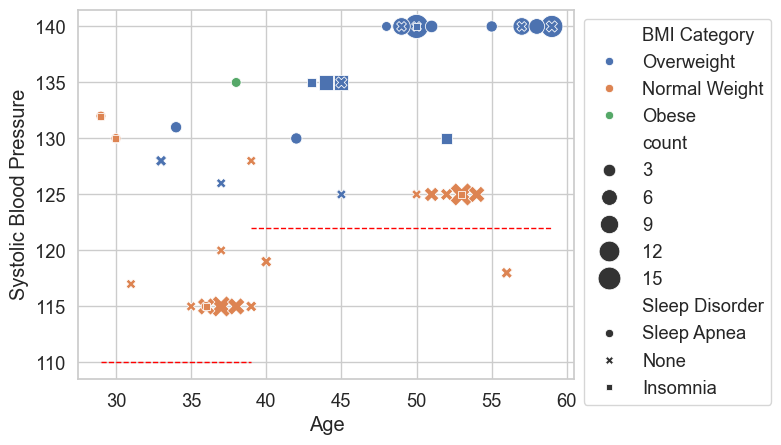

In [28]:
df_female = df[ df['Gender'] == 'Female' ]
ax = show_scatter_plot(df_female, 'Age', 'Systolic Blood Pressure', 'BMI Category', 'Sleep Disorder')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

plt.plot([29, 39], [110, 110], **line_args)
plt.plot([39, 59], [122, 122], **line_args)

Si possono notare due cose:
- al peggiorare del bmi c'è un aumento della pressione sanguigna
- considerando che c'è una correlazione tra pressione sanguigna e sleep disorders si ha che chi presenta una pressione elevata presenta, molto probabilmente, sleep disorders